In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
link = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/UCS.csv"
link2 = "https://raw.githubusercontent.com/Wild-Satellite/Datathon/main/CSV/DiscoSat.csv"


In [4]:
UCS = pd.read_csv(link , index_col=0)
DiscoSat = pd.read_csv(link2 , index_col=0)

In [5]:
UCS.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments'],
      dtype='object')

In [6]:
DiscoSat.columns

Index(['JCAT', 'Satcat', 'Piece', 'Type', 'Name', 'LDate', 'Parent', 'SDate',
       'Primary', 'DDate', 'Status', 'Owner', 'State', 'Manufacturer', 'Bus',
       'Motor', 'Mass', 'x', 'DryMass', 'x.1', 'TotMass', 'x.2', 'Length',
       'Diamete', 'Span', 'Shape', 'ODate', 'Perigee', 'Apogee', 'Inc',
       'OpOrbit', 'OQU', 'satno', 'id', 'name', 'cospar id', 'object class',
       'mass(kg)', 'shape', 'length(m)', 'height(m)', 'depth(m)',
       're-entry epoch', 'max cross section (m2)', 'min cross section (m2)',
       'avg cross section (m2)'],
      dtype='object')

In [7]:
UCS.head(2)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,0.0,566,576,0.00072,36.9,96.08,22.0,NaN,NaN,2019-12-11,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859,Pathfinder for planned earth observation const...
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476,500,0.00175,97.4,95.00,4.0,NaN,NaN,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.


In [8]:
DiscoSat.head(2)

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2)
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.9,0.6,0.9,23/05/1962,0.636200,0.270000,0.424100
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.4,4.3,4.3,12/04/1961,11.268008,4.523893,10.367256


In [9]:
df = pd.merge(DiscoSat, UCS, how='left', left_on='cospar id', right_on='COSPAR Number')

In [10]:
df.tail()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
18067,S47852,47852.0,2021-019B,R3,CZ-7A Y2 Stage 3,2021 Mar 11,R80285,2021 Mar 11 1802,Earth,NaN,O,CASC,CN,CALT,CZ-3A Stage 3,-,8400.0,?,2800.0,?,2800.0,?,12.4,3.0,12.4,Cyl,2021 Mar 19,146,34384,19.55,GTO,-,47852.0,66362.0,H-18 (Long March (CZ) YF) (Long March (CZ) 7A),2021-019B,Rocket Body,2800.0,Cyl + 1 Nozzle,3.0,12.83,12.83,NaN,39.133681,7.068583,33.764267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18068,S47858,47858.0,2021-020E,R3,CZ-4C Y42 Stage 3,2021 Mar 13,R80288,2021 Mar 13 0231?,Earth,NaN,O,CNSA,CN,SAST,CZ-4 Stage 3,-,1000.0,?,1000.0,?,1000.0,?,7.5,2.9,7.5,Cyl,2021 Mar 14,1090,1097,63.41,LEO/I,-,47858.0,66379.0,L-14B-res (YF40B-res) (Long March (CZ) 4C),2021-020E,Rocket Body,1000.0,Cyl,2.9,1.92,2.90,NaN,8.638939,5.568000,7.675696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18069,S48080,48080.0,2021-026B,R3,CZ-4C Y36 Stage 3,2021 Mar 30,R80309,2021 Mar 30 2255?,Earth,NaN,O,CNSA,CN,SAST,CZ-4 Stage 3,-,1000.0,?,1000.0,?,0.0,?,7.5,2.9,7.5,Cyl,2021 Mar 31,525,599,97.82,LLEO/S,-,48080.0,66696.0,L-14B-res (YF40B-res) (Long March (CZ) 4C),2021-026B,Rocket Body,1000.0,Cyl,2.9,1.92,2.90,NaN,8.638939,5.568000,7.675696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18070,S47782,47782.0,2021-017BN,R2----,Falcon 9-110 Stage 2,2021 Mar 4,R80272,2021 Mar 4 0833,Earth,2021-03-26 04:00:00,R,SPX,US,SPX,F9St2,-,3000.0,?,3000.0,?,3000.0,?,7.0,? 3.6,7.0,Cyl,2021 Mar 6,281,282,53.00,LLEO/I,-,47782.0,66738.0,Falcon 9 Merlin-V (1D+) (Falcon 9 v1.2),2021-017BN,Rocket Body,4300.0,Cyl,3.6,16.00,16.00,26/03/2021,58.492454,10.178760,50.328314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18071,S47965,47965.0,2021-023A,P,Veery Hatchling v0.2,2021 Mar 22,A09728,2021 Mar 22 2324,Earth,NaN,O,CAREWX,US,CAREWX/BYU,Cubesat 1U,-,1.0,NaN,1.0,NaN,1.0,NaN,0.1,0.1,0.1,Box,2021 Mar 23,538,558,45.00,LLEO/I,-,47965.0,66814.0,Electron second stage (Electron (Curie)),2021-023A,Rocket Body,250.0,Cyl,1.2,2.40,1.20,NaN,3.094107,1.130973,2.827433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18072 entries, 0 to 18071
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                17923 non-null  object 
 1   Satcat                              17923 non-null  float64
 2   Piece                               17923 non-null  object 
 3   Type                                17923 non-null  object 
 4   Name                                17923 non-null  object 
 5   LDate                               17923 non-null  object 
 6   Parent                              17923 non-null  object 
 7   SDate                               17923 non-null  object 
 8   Primary                             17923 non-null  object 
 9   DDate                               7984 non-null   object 
 10  Status                              17923 non-null  object 
 11  Owner                               17923

# Nettoyage

In [12]:
dfna = df[~df['Date of Launch'].isna()]

In [13]:
dfna.head(10)

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments
3241,S07530,7530.0,1974-089B,P,AMSAT-OSCAR-7,1974 Nov 15,S07532,1974 Nov 15 1828,Earth,NaN,O,AMNA,US,AMNA,AMSAT Phase 2,-,29.0,NaN,29.0,NaN,29.0,NaN,0.4,0.4,0.4,Oct Cyl,1974 Dec 19,1440,1461,101.73,LEO/S,-,7530.0,7528.0,OSCAR 7,1974-089B,Payload,28.74,Cyl,0.42,0.43,0.43,NaN,0.227620,0.138544,0.211115,Amsat-Oscar 7 (AO-7),Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,NaN,LEO,Polar,0.00,1440.0,1459.0,0.001215,101.40,114.90,29.0,NaN,NaN,1974-11-15,NaN,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530.0,American amateur radio satellite.
8073,S19548,19548.0,1988-091B,P ---S-,TDRS 3,1988 Sep 29,S19550,1988 Sep 29 0444,Earth,NaN,O,GSFC,US,TRW,TDRS,AOCS,2103.0,NaN,1673.0,?,2103.0,NaN,1.3,2.4,17.4,Box + Dish + 2 Pan,1988 Oct 30,35784,35797,0.01,GEO/S,-,19548.0,19545.0,TDRS 3,1988-091B,Payload,2247.77,Hex Cyl + 2 Pan,2.00,5.99,17.40,NaN,33.671884,2.701999,13.873415,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,NaN,GEO,NaN,84.41,35693.0,35878.0,0.002194,11.53,1436.06,3180.0,1600,1800,1988-09-29,10.0,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548.0,Backup; still partially operational.
8422,S20253,20253.0,1989-077A,P,FLTSATCOM F8,1989 Sep 25,S20254,1989 Sep 25 0923,Earth,NaN,O,SPAWAR,US,TRW,FLTSATCOM,Star 37FM,957.0,NaN,822.0,NaN,1928.0,NaN,1.3,2.4,13.2,Hex Cyl + Dish + 2 Pan,1989 Oct 25,35781,35786,4.98,GEO/I,-,20253.0,20250.0,USA 46 (FLTSATCOM F8),1989-077A,Payload,1928.00,Hex Cyl + 1 Dish + 2 Pan,2.40,1.30,13.20,NaN,25.607785,2.701999,11.171415,FLTSATCOM-8 (USA 46),USA 46,USA,USA,US Navy,Military,Communications,NaN,GEO,NaN,-14.74,35745.0,35829.0,0.000996,8.97,1436.13,2310.0,1884,NaN,1989-09-25,5.0,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253.0,Old system replaced by UFO satellites; this sa...
8663,S20580,20580.0,1990-037B,P ---S-,Hubble Space Telescope,1990 Apr 24,S20579 2-11,1990 Apr 25 1249?,Earth,NaN,ATT,GSFC,US,LMSC,HST,-,7547.0,NaN,7547.0,NaN,10843.0,NaN,13.1,4.3,13.1,Step Cyl + 2 Pan,1990 May 24,611,620,28.47,LEO/I,-,20580.0,20577.0,Hubble Space Telescope,1990-037B,Payload,11258.67,Cyl + 2 Pan,4.30,13.29,13.29,NaN,58.171795,14.522012,51.502485,"Hubble Space Telescope (HST, Space Telescope)",Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,NaN,LEO,Non-Polar Inclined,0.00,555.0,559.0,0.000289,28.50,95.80,11110.0,NaN,2400,1990-04-25,10.0,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580.0,Exploration of space.
8787,S20776,20776.0,1990-079A,P,Skynet 4C,1990 Aug 30,S20778,1990 Aug 30 2306,Earth,2003-10-24 00:00:00,N,MOD,UK,BAES,ECS,TE-M-700-19,1430.0,NaN,655.0,NaN,1430.0,NaN,2.1,1.9,16.0,Box + 2 Pan,1990 Sep 30,35785,35787,4.31,GEO/I,-,20776.0,20773.0,Skynet 4C,1990-079A,Payload,782.95,Hex Poly + 2 Pan,1.40,1.90,2.10,NaN,5.026143,1.539380,3.049501,Skynet 4C,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,NaN,GEO,NaN,-1.30,35775.0,35797.0,0.000261,13.60,1436

In [14]:
df['Unused'] = np.where(df['Users'].isna(), True, False)

In [15]:
df.head()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,0.636200,0.270000,0.424100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,11.268008,4.523893,10.367256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,S00104,104.0,1961 MU 2,R3,8K72KE,1961 Apr 12,R04680,1961 Apr 12 0618,Earth,1961-04-16 00:00:00,R,RVSN,SU,PROG,Blok-E,-,1440.0,NaN,1440.0,NaN,1440.0,NaN,3.8,2.6,3.8,Cyl,1961 Apr 14,154,267,65.07,LLEO/I,-,104.0,104.0,Vostok 8A92M-2 (Vostok SL-3 (A-1)),1961-012B,Rocket Body,1427.16,Cyl,2.60,3.80,3.80,16/04/1961,11.216193,5.309292,10.414380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,S00107,107.0,1961 NU 1,P A,Explorer 11,1961 Apr 27,A00095,1961 Apr 27 1425,Earth,NaN,AO,GSFC,US,MSFC,S-15,-,40.0,NaN,40.0,NaN,45.0,NaN,1.1,0.3,1.1,Step Cyl,1961 May 29,497,1777,28.76,LEO/I,-,107.0,107.0,Explorer 11,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,0.337486,0.070686,0.294524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,S00108,108.0,1961 XI 1,P A,Discoverer 25,1961 Jun 16,A00096,1961 Jun 16 2309,Earth,1961-07-12 00:00:00,AR,AFSSD/CIA,US,LMSC,CORONA,-,134.0,NaN,134.0,NaN,1114.0,NaN,1.3,1.5,1.3,Frust,1961 Jun 24,223,362,82.11,LLEO/I,-,108.0,108.0,Discoverer 25,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,11.708665,1.814584,9.992150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [16]:
df[~df['Date of Launch'].isna()]

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
3241,S07530,7530.0,1974-089B,P,AMSAT-OSCAR-7,1974 Nov 15,S07532,1974 Nov 15 1828,Earth,NaN,O,AMNA,US,AMNA,AMSAT Phase 2,-,29.0,NaN,29.0,NaN,29.0,NaN,0.4,0.4,0.4,Oct Cyl,1974 Dec 19,1440,1461,101.73,LEO/S,-,7530.0,7528.0,OSCAR 7,1974-089B,Payload,28.74,Cyl,0.42,0.43,0.43,NaN,0.227620,0.138544,0.211115,Amsat-Oscar 7 (AO-7),Amsat-Oscar 7,USA,USA,AMSAT-NA,Civil,Communications,NaN,LEO,Polar,0.00,1440.0,1459.0,0.001215,101.40,114.90,29.0,NaN,NaN,1974-11-15,NaN,Amsat-NA,USA,Vandenberg AFB,Delta 2310,1974-089B,7530.0,American amateur radio satellite.,False
8073,S19548,19548.0,1988-091B,P ---S-,TDRS 3,1988 Sep 29,S19550,1988 Sep 29 0444,Earth,NaN,O,GSFC,US,TRW,TDRS,AOCS,2103.0,NaN,1673.0,?,2103.0,NaN,1.3,2.4,17.4,Box + Dish + 2 Pan,1988 Oct 30,35784,35797,0.01,GEO/S,-,19548.0,19545.0,TDRS 3,1988-091B,Payload,2247.77,Hex Cyl + 2 Pan,2.00,5.99,17.40,NaN,33.671884,2.701999,13.873415,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",TDRS-3,USA,USA,National Aeronautics and Space Administration ...,Government,Communications,NaN,GEO,NaN,84.41,35693.0,35878.0,0.002194,11.53,1436.06,3180.0,1600,1800,1988-09-29,10.0,TRW Defense and Space Systems Group,USA,Cape Canaveral,Space Shuttle (STS 26),1988-091B,19548.0,Backup; still partially operational.,False
8422,S20253,20253.0,1989-077A,P,FLTSATCOM F8,1989 Sep 25,S20254,1989 Sep 25 0923,Earth,NaN,O,SPAWAR,US,TRW,FLTSATCOM,Star 37FM,957.0,NaN,822.0,NaN,1928.0,NaN,1.3,2.4,13.2,Hex Cyl + Dish + 2 Pan,1989 Oct 25,35781,35786,4.98,GEO/I,-,20253.0,20250.0,USA 46 (FLTSATCOM F8),1989-077A,Payload,1928.00,Hex Cyl + 1 Dish + 2 Pan,2.40,1.30,13.20,NaN,25.607785,2.701999,11.171415,FLTSATCOM-8 (USA 46),USA 46,USA,USA,US Navy,Military,Communications,NaN,GEO,NaN,-14.74,35745.0,35829.0,0.000996,8.97,1436.13,2310.0,1884,NaN,1989-09-25,5.0,"TRW, Defense and Space Systems Group",USA,Cape Canaveral,Atlas Centaur,1989-077A,20253.0,Old system replaced by UFO satellites; this sa...,False
8663,S20580,20580.0,1990-037B,P ---S-,Hubble Space Telescope,1990 Apr 24,S20579 2-11,1990 Apr 25 1249?,Earth,NaN,ATT,GSFC,US,LMSC,HST,-,7547.0,NaN,7547.0,NaN,10843.0,NaN,13.1,4.3,13.1,Step Cyl + 2 Pan,1990 May 24,611,620,28.47,LEO/I,-,20580.0,20577.0,Hubble Space Telescope,1990-037B,Payload,11258.67,Cyl + 2 Pan,4.30,13.29,13.29,NaN,58.171795,14.522012,51.502485,"Hubble Space Telescope (HST, Space Telescope)",Hubble Space Telescope,USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,NaN,LEO,Non-Polar Inclined,0.00,555.0,559.0,0.000289,28.50,95.80,11110.0,NaN,2400,1990-04-25,10.0,European Space Agency/NASA,International,Cape Canaveral,Space Shuttle (STS 31),1990-037B,20580.0,Exploration of space.,False
8787,S20776,20776.0,1990-079A,P,Skynet 4C,1990 Aug 30,S20778,1990 Aug 30 2306,Earth,2003-10-24 00:00:00,N,MOD,UK,BAES,ECS,TE-M-700-19,1430.0,NaN,655.0,NaN,1430.0,NaN,2.1,1.9,16.0,Box + 2 Pan,1990 Sep 30,35785,35787,4.31,GEO/I,-,20776.0,20773.0,Skynet 4C,1990-079A,Payload,782.95,Hex Poly + 2 Pan,1.40,1.90,2.10,NaN,5.026143,1.539380,3.049501,Skynet 4C,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,NaN,GEO,NaN,-1.30,3577

In [17]:
df['object class'].unique()

array(['Payload', 'Rocket Body', 'Rocket Mission Related Object',
       'Payload Mission Related Object', 'Rocket Fragmentation Debris',
       'Payload Fragmentation Debris', 'Rocket Debris', 'Payload Debris'],
      dtype=object)

In [18]:
df2 = df[df['object class'] == 'Payload'] 

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                10071 non-null  object 
 1   Satcat                              10071 non-null  float64
 2   Piece                               10071 non-null  object 
 3   Type                                10071 non-null  object 
 4   Name                                10071 non-null  object 
 5   LDate                               10071 non-null  object 
 6   Parent                              10071 non-null  object 
 7   SDate                               10071 non-null  object 
 8   Primary                             10071 non-null  object 
 9   DDate                               2872 non-null   object 
 10  Status                              10071 non-null  object 
 11  Owner                               10071

In [20]:
df2.head()

,JCAT,Satcat,Piece,Type,Name,LDate,Parent,SDate,Primary,DDate,Status,Owner,State,Manufacturer,Bus,Motor,Mass,x,DryMass,x.1,TotMass,x.2,Length,Diamete,Span,Shape,ODate,Perigee,Apogee,Inc,OpOrbit,OQU,satno,id,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,max cross section (m2),min cross section (m2),avg cross section (m2),"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Unused
0,S00102,102.0,1961 LAM 2,PX-R---,SRV 521,1961 Apr 8,S00100,1961 Apr 10 1956?,Earth,1962-05-23 00:00:00,R,AFSSD/CIA,US,GERSD,SRV Mk V,Star 12,157.0,NaN,157.0,NaN,190.0,NaN,0.8,0.7,0.8,Cone,1961 May 11,202,1416,81.94,LEO/I,-,102.0,102.0,Capsule (00102),1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,0.636200,0.270000,0.424100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,S00103,103.0,1961 MU 1,PH H,Vostok,1961 Apr 12,S00104,1961 Apr 12 0618,Earth,1961-04-12 07:47:00,L,OKB1,SU,OKB1,Vostok,-,2125.0,NaN,2125.0,NaN,4725.0,NaN,6.5,? 2.4 ?,6.5,? Sphere + DCone,1961 Apr 12,168,314,64.95,LLEO/I,-,103.0,103.0,Vostok 1,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,11.268008,4.523893,10.367256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,S00107,107.0,1961 NU 1,P A,Explorer 11,1961 Apr 27,A00095,1961 Apr 27 1425,Earth,NaN,AO,GSFC,US,MSFC,S-15,-,40.0,NaN,40.0,NaN,45.0,NaN,1.1,0.3,1.1,Step Cyl,1961 May 29,497,1777,28.76,LEO/I,-,107.0,107.0,Explorer 11,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,0.337486,0.070686,0.294524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,S00108,108.0,1961 XI 1,P A,Discoverer 25,1961 Jun 16,A00096,1961 Jun 16 2309,Earth,1961-07-12 00:00:00,AR,AFSSD/CIA,US,LMSC,CORONA,-,134.0,NaN,134.0,NaN,1114.0,NaN,1.3,1.5,1.3,Frust,1961 Jun 24,223,362,82.11,LLEO/I,-,108.0,108.0,Discoverer 25,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,11.708665,1.814584,9.992150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,S00110,110.0,1958 ETA,P,Pioneer 1,1958 Oct 11,A00010,1958 Oct 11 0848?,Earth,1958-10-13 04:46:00,R,NASAHQ/TRW,US,TRW,Able I Pioneer,TX-8 Falcon,22.0,NaN,22.0,NaN,38.0,NaN,0.7,0.7,1.0,DCone,1958 Oct 11,-870,113860,35.89,SO,-,110.0,110.0,Pioneer 1,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,12/10/1958,0.430100,0.281200,0.353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [21]:
df3 = df2.drop(columns=['JCAT', 'Satcat', 'Piece', 'Type', 'Parent', 'SDate', 'Primary', 'Motor', 'x', 'x.1',
                  'x.2','Shape', 'ODate', 'satno', 'id', 'max cross section (m2)', 'min cross section (m2)',
                  'avg cross section (m2)', 'Name of Satellite, Alternate Names', 'Current Official Name of Satellite',
                  'Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose', 'Detailed Purpose',
                  'Class of Orbit', 'Type of Orbit', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
                  'Eccentricity', 'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', 'Dry Mass (kg.)',
                  'Power (watts)', 'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
                  'Country of Contractor', 'Launch Site', 'Launch Vehicle', 'NORAD Number', 'COSPAR Number', 'Comments'])

In [22]:
e = df2["Owner"].value_counts().reset_index()
e.sort_values(by='Owner')

,index,Owner
1100,UNSW,1
729,WEBC,1
730,AEB/UNB,1
731,ESHAIL/EUTSA,1
732,WUHAN,1
...,...,...
4,GUKOS,303
3,PLABS,344
2,GUKOSR,542
1,PVO,802


In [23]:
df2['Owner'].unique()

array(['AFSSD/CIA', 'OKB1', 'GSFC', ..., 'SYNSP', 'DKJ38', 'HBUT'],
      dtype=object)

In [24]:
d = df2["Shape"].value_counts().reset_index()
d.sort_values(by='index')

,index,Shape
188,-,3
127,0 Cyl + 2 Dish,5
247,02 Box,2
248,03 Box,2
537,10 DCone,1
...,...,...
220,Truss + 2 Dish + 2 Pan,2
172,Truss + 2 Wing,3
104,Truss + 3 Leg,6
293,Truss + 3 Leg + pan,1


In [25]:
d = df2["DryMass"].value_counts().reset_index()
d.sort_values(by='index')

,index,DryMass
26,0.0,83
5,1.0,221
15,2.0,115
31,3.0,65
2,4.0,451
...,...,...
1032,92840.0,1
839,93391.0,1
798,93516.0,1
641,94277.0,1


In [26]:
c = df2["DryMass"].value_counts().reset_index()
c.sort_values(by='index')

,index,DryMass
26,0.0,83
5,1.0,221
15,2.0,115
31,3.0,65
2,4.0,451
...,...,...
1032,92840.0,1
839,93391.0,1
798,93516.0,1
641,94277.0,1


In [27]:
b = df2["Mass"].value_counts().reset_index()
b.sort_values(by='index')

,index,Mass
19,0.0,83
5,1.0,221
11,2.0,116
28,3.0,64
2,4.0,449
...,...,...
968,102350.0,1
987,102454.0,1
1065,102695.0,1
1326,103711.0,1


In [28]:
df['Primary'].unique()

array(['Earth', nan], dtype=object)

In [29]:
df['Status'].unique()

array(['R', 'L', 'AO', 'AR', 'DSO', 'O', 'R?', 'D', 'E', nan, 'DK', 'DSA',
       'OX', 'ATT', 'N', 'L?', 'ERR', 'GRP', 'TFR', 'EVA'], dtype=object)

In [30]:
df['Bus'].unique()

array(['SRV Mk V', 'Vostok', 'Blok-E', ..., 'UNK', 'TY-MINISAR', 'XYZ'],
      dtype=object)

In [31]:
df['Motor'].unique()

array(['Star 12', '-', 'TX-8 Falcon', 'KDU-414', 'KTDU-5A', 'TE-M-375',
       'P-11 motor', 'JPL SR-12-1', 'BE3A', 'I-2B DU', 'SRM', 'BE-3',
       'SR-12-1', 'Star 13A', nan, 'Starfinder', 'BE-3A', 'US DU',
       'SRS Motor', 'TE-M-364-1', 'TE-364-1 A2', 'OGCh Retro', 'SVM-1',
       'UNK', 'Star 13', 'R-4D', 'SR-28-3', 'TE-364-5 A2', 'SVM-1 S/N 3',
       'JPL SR-28-3', 'KTDU-35', 'MRE-4', 'MRE-50', 'SVM-2', 'BE-3A7',
       'KTDU-417', 'Star 17A', 'MMBPS?', 'SVM-4A', 'KTDU-66', 'KTDU-425',
       'RS-21/MRE-50', 'SCS', 'FW4S', 'KDU-414?', 'AJ10-118E', '11D58',
       'MRE-1', 'AJ10-118F', 'FW5', 'OPS DU', 'Star 17', 'Star 24',
       'SVM-5', 'S400', 'TR-201', 'SVM-7', 'TE-M-604', 'SVM-6', '11D430',
       'Star 37S', 'NASDA AKM', 'SNIA-BPD AB', 'AOCS', 'Star 27',
       'SNIA-BPD', 'SVM-6A', 'Star 24C', 'Star 37F', 'SVM-6?', 'SVM-2B',
       'MMS-AOCS', 'TE-M-700-5', 'Star 27 TE-', 'Mage 1', 'SLV-3-4',
       'TE-M-700-8', 'R-4D-11', 'ACOS', 'Star 27B TE', 'Star 37XF',
       'Ma

In [32]:
a = df2["Motor"].value_counts().reset_index()

In [33]:
a
# plus de la moitié sans la ref du motor.... cette colonne sera enlevée

,index,Motor
0,-,8182
1,AOCS,248
2,S400,100
3,R-4D-11-300,80
4,11D428A,74
...,...,...
209,Leros 1?,1
210,R-4D-14-300,1
211,XMM AOCS,1
212,SVM-2,1


In [34]:
df3.tail(15)

,Name,LDate,DDate,Status,Owner,State,Manufacturer,Bus,Mass,DryMass,TotMass,Length,Diamete,Span,Perigee,Apogee,Inc,OpOrbit,OQU,name,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused
18040,OneWeb SL0109,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0144,2020-100AJ,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18041,OneWeb SL0122,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0145,2020-100AK,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18042,OneWeb SL0114,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0146,2020-100AL,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18043,OneWeb SL0125,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,448,454,87.47,LLEO/P,-,OneWeb 0147,2020-100AM,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18044,OneWeb SL0145,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,446,446,87.47,LLEO/P,-,OneWeb 0110,2020-100C,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18045,OneWeb SL0135,2020 Dec 18,NaN,O,ONEWEB,UK,ADST,ARROW,148.0,140.0,148.0,1.3,1.0,5.0,433,445,87.40,LLEO/P,-,OneWeb 0109,2020-100B,Payload,148.0,Box + 2 Pan,1.0,1.3,5.0,NaN,False
18046,USA 313,2020 Dec 19,NaN,O,NROC,US,UNKUS,UNK,2000.0,1500.0,2000.0,4.0,? 2.5 ?,10.0,519,540,51.40,LLEO/I,-,USA 313,2020-101B,Payload,2000.0,Box + 2 Pan,2.5,4.0,10.0,NaN,False
18047,USA 312,2020 Dec 19,NaN,O,NROC,US,UNKUS,UNK,2000.0,1500.0,2000.0,4.0,? 2.5 ?,10.0,519,540,51.40,LLEO/I,-,USA 312,2020-101A,Payload,2000.0,Box + 2 Pan,2.5,4.0,10.0,NaN,False
18048,Tianqi Xingzuo 08,2020 Dec 22,NaN,O,GUOG,CN,ASES,StarLightB,40.0,40.0,40.0,0.5,? 0.3 ?,0.5,494,497,97.39,LLEO/S,-,Tianqi-8,2020-102A,Payload,40.0,Box,0.3,0.5,0.5,NaN,False
18049,Haisi-1,2020 Dec 22,NaN,O,DKJ38,CN,CTYK,TY-MINISAR,185.0,185.0,185.0,1.0,? 0.5 ?,3.0,502,511,97.44,LLEO/S,-,Haisi-1,2020-102B,Payload,185.0,Box + 2 Pan,0.2,0.3,1.0,NaN,False


In [35]:
df3.State.unique()

array(['US', 'SU', 'UK', 'CA', 'I', nan, 'I-INT', 'F', 'AU', 'I-ESRO',
       'D', 'J', 'CN', 'NL', 'E', 'IN', 'I-ESA', 'ID', 'CSSR', 'I-EUT',
       'I-ARAB', 'BR', 'MX', 'S', 'I-EUM', 'IL', 'L', 'AR', 'HKUK',
       'I-INM', 'CSFR', 'RU', 'KR', 'P', 'T', 'TR', 'CZ', 'UA', 'MY', 'N',
       'PH', 'HK', 'EG', 'CL', 'SG', 'TW', 'ZA', 'DK', 'SA', 'UAE', 'BM',
       'PK', 'MA', 'DZ', 'GR', 'NG', 'IR', 'KZ', 'CO', 'I-RASC', 'VE',
       'CH', 'MU', 'HU', 'PL', 'RO', 'VN', 'BY', 'KP', 'AZ', 'AT', 'EC',
       'EE', 'QA', 'PE', 'BO', 'LT', 'B', 'UY', 'I-EU', 'PG', 'MC', 'LA',
       'PR', 'FI', 'IE', 'BG', 'LV', 'SK', 'AO', 'NZ', 'CR', 'KE', 'BD',
       'BGN', 'BT', 'JO', 'LK', 'NP', 'SD', 'ET', 'GT', 'SI'],
      dtype=object)

In [36]:
df3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10071 non-null  object 
 1   LDate           10071 non-null  object 
 2   DDate           2872 non-null   object 
 3   Status          10071 non-null  object 
 4   Owner           10071 non-null  object 
 5   State           10071 non-null  object 
 6   Manufacturer    10071 non-null  object 
 7   Bus             10071 non-null  object 
 8   Mass            10071 non-null  float64
 9   DryMass         10071 non-null  float64
 10  TotMass         10071 non-null  float64
 11  Length          10071 non-null  float64
 12  Diamete         10071 non-null  object 
 13  Span            10071 non-null  float64
 14  Perigee         10071 non-null  object 
 15  Apogee          10071 non-null  object 
 16  Inc             10071 non-null  object 
 17  OpOrbit         10071 non-null 

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JCAT                                10071 non-null  object 
 1   Satcat                              10071 non-null  float64
 2   Piece                               10071 non-null  object 
 3   Type                                10071 non-null  object 
 4   Name                                10071 non-null  object 
 5   LDate                               10071 non-null  object 
 6   Parent                              10071 non-null  object 
 7   SDate                               10071 non-null  object 
 8   Primary                             10071 non-null  object 
 9   DDate                               2872 non-null   object 
 10  Status                              10071 non-null  object 
 11  Owner                               10071

In [38]:
df2['Status'].unique()

array(['R', 'L', 'AO', 'AR', 'DSO', 'O', 'R?', 'D', 'E', nan, 'DK', 'OX',
       'ATT', 'DSA', 'N', 'L?', 'GRP', 'TFR', 'EVA'], dtype=object)

In [39]:
df2.iloc[561, :]

JCAT                  S02612
Satcat                  2612
Piece              1966-112A
Type                       P
Name              Kosmos-135
                     ...    
Launch Vehicle           NaN
COSPAR Number            NaN
NORAD Number             NaN
Comments                 NaN
Unused                  True
Name: 1117, Length: 75, dtype: object

In [40]:
df3.drop(columns=["OQU", "name", "Status", "Mass", "DryMass","TotMass", "Length", "Diamete"], inplace=True)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            10071 non-null  object 
 1   LDate           10071 non-null  object 
 2   DDate           2872 non-null   object 
 3   Owner           10071 non-null  object 
 4   State           10071 non-null  object 
 5   Manufacturer    10071 non-null  object 
 6   Bus             10071 non-null  object 
 7   Span            10071 non-null  float64
 8   Perigee         10071 non-null  object 
 9   Apogee          10071 non-null  object 
 10  Inc             10071 non-null  object 
 11  OpOrbit         10071 non-null  object 
 12  cospar id       10072 non-null  object 
 13  object class    10076 non-null  object 
 14  mass(kg)        10059 non-null  float64
 15  shape           10076 non-null  object 
 16  length(m)       10076 non-null  float64
 17  height(m)       10076 non-null 

In [42]:
df4 = df3.copy()

# Encoding

## Decay Date

In [43]:
df4.head()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused
0,SRV 521,1961 Apr 8,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,23/05/1962,True
1,Vostok,1961 Apr 12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,12/04/1961,True
3,Explorer 11,1961 Apr 27,NaN,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaN,True
4,Discoverer 25,1961 Jun 16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,12/07/1961,True
5,Pioneer 1,1958 Oct 11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,12/10/1958,True


In [44]:
df4.iloc[:, [1, 2, 19]] = df3.iloc[:, [1, 2, 19]].apply(pd.to_datetime, errors='coerce')

In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            10071 non-null  object        
 1   LDate           10071 non-null  datetime64[ns]
 2   DDate           2872 non-null   datetime64[ns]
 3   Owner           10071 non-null  object        
 4   State           10071 non-null  object        
 5   Manufacturer    10071 non-null  object        
 6   Bus             10071 non-null  object        
 7   Span            10071 non-null  float64       
 8   Perigee         10071 non-null  object        
 9   Apogee          10071 non-null  object        
 10  Inc             10071 non-null  object        
 11  OpOrbit         10071 non-null  object        
 12  cospar id       10072 non-null  object        
 13  object class    10076 non-null  object        
 14  mass(kg)        10059 non-null  float64       
 15  sh

In [46]:
df4['LifeSpan']= df4['DDate']- df4['LDate']

In [47]:
df4

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,Xinjishu Yanzheng 7,2020-12-22,NaT,CAST,CN,CAST,XYZ,9.0,504,515,97.44,LLEO/S,2020-102C,Payload,5000.00,Box + 2 Pan + 1 Dish,3.00,5.00,9.00,NaT,False,NaT
18051,Yuanguang,2020-12-22,NaT,HBUT,CN,CTYK,Cubesat 12U,1.0,500,508,97.44,LLEO/S,2020-102D,Payload,20.00,Box + 2 Pan,0.50,1.00,3.00,NaT,False,NaT
18052,ET-SMART-RSS,2020-12-22,NaT,ESSTI,ET,ZHIX,Cubesat 6U,0.3,503,513,97.43,LLEO/S,2020-102E,Payload,10.00,Box,0.20,0.30,0.30,NaT,False,NaT
18055,Yaogan Weixing 33,2020-12-27,NaT,ZZB,CN,SAST,JB-9,5.0,681,685,98.26,LEO/S,2020-103A,Payload,1040.00,Box + 2 Pan,1.50,1.50,5.00,NaT,False,NaT


In [48]:
df4['Reentry']= df4['re-entry epoch']- df4['LDate']

In [49]:
df4.head(10)

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days
6,Pioneer 3,1958-12-06,1958-12-07 19:52:00,ABMA,US,JPL,Juno II Probe,0.6,-70?,102200,28.50?,SO,1958-008A,Payload,5.83,Cone,0.25,0.58,0.58,1958-07-12,True,1 days 19:52:00,-147 days
7,AMS Luna-1,1959-01-02,NaT,OKB1,SU,OKB1,E-1,2.0,-370?,-242160?,65.00,EEO,1959-012A,Payload,357.78,Sphere,0.90,0.90,0.90,NaT,True,NaT,NaT
8,Pioneer 4,1959-03-03,1959-03-03 16:54:00,ABMA,US,JPL,Juno II Probe,0.6,-45,Inf,29.00,EEO,1959-013A,Payload,6.03,Cone,0.23,0.51,0.51,NaT,True,0 days 16:54:00,NaT
9,AMS Luna-2,1959-09-12,1959-09-12 18:15:00,OKB1,SU,OKB1,E-1,2.0,-371,-354774,65.30,EEO,1959-014A,Payload,386.52,Sphere,1.20,1.20,1.20,1959-09-13,True,0 days 18:15:00,1 days
10,Transit 4A,1961-06-29,NaT,BUWEPS,US,APL,Transit 4,1.1,880,997,66.81,LEO/I,1961-015A,Payload,78.30,Cyl,1.09,0.79,1.09,NaT,True,NaT,NaT


In [50]:
df4['LifeSpan'].describe()

count                            2872
mean     1138 days 03:03:21.246518272
std      2177 days 19:12:33.639385248
min                   0 days 00:00:00
25%                   8 days 00:00:00
50%                 222 days 00:00:00
75%                1015 days 06:00:00
max               18333 days 00:00:00
Name: LifeSpan, dtype: object

In [51]:
from datetime import datetime, timedelta

In [52]:
df4['Days'] = df4['LifeSpan']/ timedelta (days=1)

In [53]:
df4.head()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days,410.000000
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days,0.324306
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT,NaN
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days,26.000000
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days,2.198611


Il y a pas mal de satellites sans reentry ou decay date mais non actifs

In [54]:
df4.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
df5 = df4[df4.Unused == True]

In [57]:
df6 = df4[df4.Unused == False]

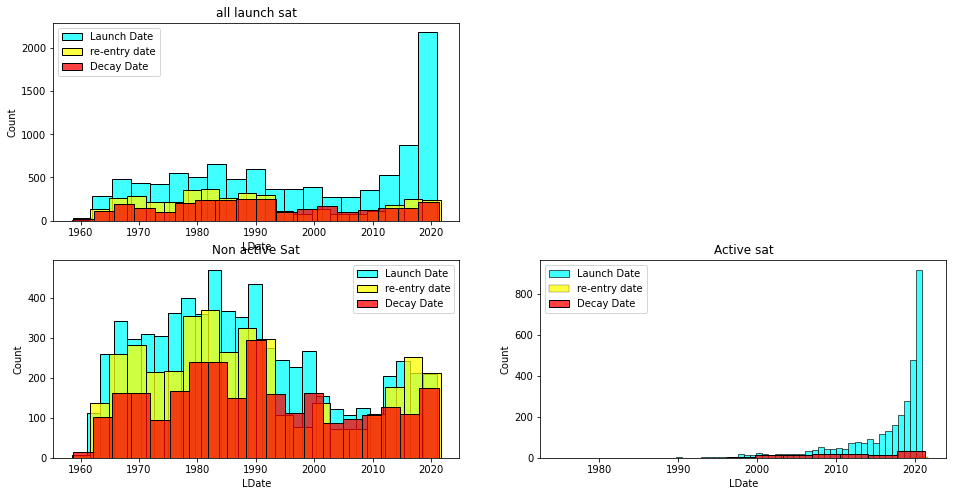

In [58]:
fig, ax = plt.subplots (figsize  = (16, 8))

ax1 = plt.subplot(221)
sns.histplot(data=df4, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df4, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df4, x='DDate', color='red', label='Decay Date')
plt.title('all launch sat')
plt.legend()

ax1 = plt.subplot(223)
sns.histplot(data=df5, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df5, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df5, x='DDate', color='red', label='Decay Date')
plt.title('Non active Sat')
plt.legend()

ax1 = plt.subplot(224)
sns.histplot(data=df6, x='LDate', color='cyan', label='Launch Date')
sns.histplot(data=df6, x='re-entry epoch', color='yellow', label="re-entry date")
sns.histplot(data=df6, x='DDate', color='red', label='Decay Date')
plt.title('Active sat')
plt.legend()

plt.show()

## Owner

Récupération des satellites avec une date de réentry

In [59]:
df7 = df4.copy()

In [60]:
df7.tail()

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days
18050,Xinjishu Yanzheng 7,2020-12-22,NaT,CAST,CN,CAST,XYZ,9.0,504,515,97.44,LLEO/S,2020-102C,Payload,5000.0,Box + 2 Pan + 1 Dish,3.0,5.0,9.0,NaT,False,NaT,NaT,NaN
18051,Yuanguang,2020-12-22,NaT,HBUT,CN,CTYK,Cubesat 12U,1.0,500,508,97.44,LLEO/S,2020-102D,Payload,20.0,Box + 2 Pan,0.5,1.0,3.0,NaT,False,NaT,NaT,NaN
18052,ET-SMART-RSS,2020-12-22,NaT,ESSTI,ET,ZHIX,Cubesat 6U,0.3,503,513,97.43,LLEO/S,2020-102E,Payload,10.0,Box,0.2,0.3,0.3,NaT,False,NaT,NaT,NaN
18055,Yaogan Weixing 33,2020-12-27,NaT,ZZB,CN,SAST,JB-9,5.0,681,685,98.26,LEO/S,2020-103A,Payload,1040.0,Box + 2 Pan,1.5,1.5,5.0,NaT,False,NaT,NaT,NaN
18056,Weina Jishu Shiyan Weixing,2020-12-27,NaT,CASC,CN,CAST,-,0.3,681,683,98.26,LEO/S,2020-103B,Payload,10.0,Box,0.1,0.3,0.3,NaT,True,NaT,NaT,NaN


In [61]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

coding owner

In [62]:
df7['OwnerF']=df7['Owner'].factorize()[0]

In [63]:
df7

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days,OwnerF
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days,410.000000,0
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days,0.324306,1
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT,NaN,2
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days,26.000000,0
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days,2.198611,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,Xinjishu Yanzheng 7,2020-12-22,NaT,CAST,CN,CAST,XYZ,9.0,504,515,97.44,LLEO/S,2020-102C,Payload,5000.00,Box + 2 Pan + 1 Dish,3.00,5.00,9.00,NaT,False,NaT,NaT,NaN,420
18051,Yuanguang,2020-12-22,NaT,HBUT,CN,CTYK,Cubesat 12U,1.0,500,508,97.44,LLEO/S,2020-102D,Payload,20.00,Box + 2 Pan,0.50,1.00,3.00,NaT,False,NaT,NaT,NaN,1100
18052,ET-SMART-RSS,2020-12-22,NaT,ESSTI,ET,ZHIX,Cubesat 6U,0.3,503,513,97.43,LLEO/S,2020-102E,Payload,10.00,Box,0.20,0.30,0.30,NaT,False,NaT,NaT,NaN,1033
18055,Yaogan Weixing 33,2020-12-27,NaT,ZZB,CN,SAST,JB-9,5.0,681,685,98.26,LEO/S,2020-103A,Payload,1040.00,Box + 2 Pan,1.50,1.50,5.00,NaT,False,NaT,NaT,NaN,335


Coding pays (state)

In [64]:
df7['StateF']=df7['State'].factorize()[0]

In [65]:
df7.head(15)

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days,OwnerF,StateF
0,SRV 521,1961-04-08,1962-05-23 00:00:00,AFSSD/CIA,US,GERSD,SRV Mk V,0.8,202,1416,81.94,LEO/I,1961-011B,Payload,148.66,Cone,0.90,0.60,0.90,1962-05-23,True,410 days 00:00:00,410 days,410.000000,0,0
1,Vostok,1961-04-12,1961-04-12 07:47:00,OKB1,SU,OKB1,Vostok,6.5,168,314,64.95,LLEO/I,1961-012A,Payload,4682.85,Sphere + Cyl,2.40,4.30,4.30,1961-12-04,True,0 days 07:47:00,236 days,0.324306,1,1
3,Explorer 11,1961-04-27,NaT,GSFC,US,MSFC,S-15,1.1,497,1777,28.76,LEO/I,1961-013A,Payload,36.67,Cyl,0.38,2.26,2.26,NaT,True,NaT,NaT,NaN,2,0
4,Discoverer 25,1961-06-16,1961-07-12 00:00:00,AFSSD/CIA,US,LMSC,CORONA,1.3,223,362,82.11,LLEO/I,1961-014A,Payload,941.53,Cone + Cyl,1.52,7.61,7.61,1961-12-07,True,26 days 00:00:00,174 days,26.000000,0,0
5,Pioneer 1,1958-10-11,1958-10-13 04:46:00,NASAHQ/TRW,US,TRW,Able I Pioneer,1.0,-870,113860,35.89,SO,1958-007A,Payload,22.99,Cone,0.74,0.76,0.76,1958-12-10,True,2 days 04:46:00,60 days,2.198611,3,0
6,Pioneer 3,1958-12-06,1958-12-07 19:52:00,ABMA,US,JPL,Juno II Probe,0.6,-70?,102200,28.50?,SO,1958-008A,Payload,5.83,Cone,0.25,0.58,0.58,1958-07-12,True,1 days 19:52:00,-147 days,1.827778,4,0
7,AMS Luna-1,1959-01-02,NaT,OKB1,SU,OKB1,E-1,2.0,-370?,-242160?,65.00,EEO,1959-012A,Payload,357.78,Sphere,0.90,0.90,0.90,NaT,True,NaT,NaT,NaN,1,1
8,Pioneer 4,1959-03-03,1959-03-03 16:54:00,ABMA,US,JPL,Juno II Probe,0.6,-45,Inf,29.00,EEO,1959-013A,Payload,6.03,Cone,0.23,0.51,0.51,NaT,True,0 days 16:54:00,NaT,0.704167,4,0
9,AMS Luna-2,1959-09-12,1959-09-12 18:15:00,OKB1,SU,OKB1,E-1,2.0,-371,-354774,65.30,EEO,1959-014A,Payload,386.52,Sphere,1.20,1.20,1.20,1959-09-13,True,0 days 18:15:00,1 days,0.760417,1,1
10,Transit 4A,1961-06-29,NaT,BUWEPS,US,APL,Transit 4,1.1,880,997,66.81,LEO/I,1961-015A,Payload,78.30,Cyl,1.09,0.79,1.09,NaT,True,NaT,NaT,NaN,5,0


Coding Manufacturer

In [66]:
df7['ManufacturerF']=df7['Manufacturer'].factorize()[0]

Coding Bus OpOrbit Shape

In [67]:
df7['BusF']=df7['Bus'].factorize()[0]

In [68]:
df7['OpOrbitF']=df7['OpOrbit'].factorize()[0]

In [69]:
df7['shapeF']=df7['shape'].factorize()[0]

In [70]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         10071 non-null  object         
 9   Apogee          10071 non-null  object         
 10  Inc             10071 non-null  object         
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [71]:
df7.iloc[:, [7, 8, 9, 10]] = df7.iloc[:, [7, 8, 9, 10]].apply(pd.to_numeric, errors='coerce')

In [72]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10076 entries, 0 to 18056
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            10071 non-null  object         
 1   LDate           10071 non-null  datetime64[ns] 
 2   DDate           2872 non-null   datetime64[ns] 
 3   Owner           10071 non-null  object         
 4   State           10071 non-null  object         
 5   Manufacturer    10071 non-null  object         
 6   Bus             10071 non-null  object         
 7   Span            10071 non-null  float64        
 8   Perigee         9913 non-null   float64        
 9   Apogee          9919 non-null   float64        
 10  Inc             9958 non-null   float64        
 11  OpOrbit         10071 non-null  object         
 12  cospar id       10072 non-null  object         
 13  object class    10076 non-null  object         
 14  mass(kg)        10059 non-null  float6

In [73]:
df7[df7.duplicated(keep=False)]

,Name,LDate,DDate,Owner,State,Manufacturer,Bus,Span,Perigee,Apogee,Inc,OpOrbit,cospar id,object class,mass(kg),shape,length(m),height(m),depth(m),re-entry epoch,Unused,LifeSpan,Reentry,Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
12544,DirecTV 10,2007-07-07,NaT,DTV,US,BOES,BSS-702HP,48.1,35786.0,35788.0,0.06,GEO/S,2007-032A,Payload,5893.000,Box + 2 Pan,3.3,8.000,48.1,NaT,False,NaT,NaT,NaN,331,0,286,641,16,119
12545,DirecTV 10,2007-07-07,NaT,DTV,US,BOES,BSS-702HP,48.1,35786.0,35788.0,0.06,GEO/S,2007-032A,Payload,5893.000,Box + 2 Pan,3.3,8.000,48.1,NaT,False,NaT,NaT,NaN,331,0,286,641,16,119
12611,Raduga-1M,2007-12-09,NaT,KVR,RU,RESH/POLK,Globus?,20.0,35572.0,35952.0,0.06,GEO/D,2007-058A,Payload,2300.000,Step Cyl + 2 Pan,2.0,5.000,20.0,NaT,True,NaT,NaT,NaN,378,30,383,711,18,117
12612,Raduga-1M,2007-12-09,NaT,KVR,RU,RESH/POLK,Globus?,20.0,35572.0,35952.0,0.06,GEO/D,2007-058A,Payload,2300.000,Step Cyl + 2 Pan,2.0,5.000,20.0,NaT,True,NaT,NaT,NaN,378,30,383,711,18,117
12617,COSMO 2,2007-12-09,NaT,ASI,I,THALA,Prima,12.0,621.0,624.0,97.86,LEO/S,2007-059A,Payload,1900.000,Box + 2 Pan,1.4,1.400,12.0,NaT,False,NaT,NaT,NaN,170,4,380,779,10,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,SpaceBEE-37,2020-11-20,NaT,SWARM,US,SWARM,Cubesat 0.25U,0.9,492.0,513.0,97.37,LLEO/S,2020-085H,Payload,0.284,Box + 2 Ant,0.1,0.025,0.9,NaT,False,NaT,NaT,NaN,857,0,673,1061,12,226
17899,SpaceBEE-36,2020-11-20,NaT,SWARM,US,SWARM,Cubesat 0.25U,0.9,492.0,513.0,97.36,LLEO/S,2020-085G,Payload,0.284,Box + 2 Ant,0.1,0.025,0.9,NaT,False,NaT,NaT,NaN,857,0,673,1061,12,226
17900,SpaceBEE-36,2020-11-20,NaT,SWARM,US,SWARM,Cubesat 0.25U,0.9,492.0,513.0,97.36,LLEO/S,2020-085G,Payload,0.284,Box + 2 Ant,0.1,0.025,0.9,NaT,False,NaT,NaT,NaN,857,0,673,1061,12,226
17904,SpaceBEE-34,2020-11-20,NaT,SWARM,US,SWARM,Cubesat 0.25U,0.9,498.0,511.0,97.36,LLEO/S,2020-085E,Payload,0.284,Box + 2 Ant,0.1,0.025,0.9,NaT,False,NaT,NaT,NaN,857,0,673,1061,12,226


In [74]:
df7.duplicated(keep='first').sum()

208

In [75]:
df7.drop_duplicates(keep='first', inplace=True)

In [76]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 18056
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Name            9863 non-null   object         
 1   LDate           9863 non-null   datetime64[ns] 
 2   DDate           2842 non-null   datetime64[ns] 
 3   Owner           9863 non-null   object         
 4   State           9863 non-null   object         
 5   Manufacturer    9863 non-null   object         
 6   Bus             9863 non-null   object         
 7   Span            9863 non-null   float64        
 8   Perigee         9707 non-null   float64        
 9   Apogee          9713 non-null   float64        
 10  Inc             9751 non-null   float64        
 11  OpOrbit         9863 non-null   object         
 12  cospar id       9864 non-null   object         
 13  object class    9868 non-null   object         
 14  mass(kg)        9851 non-null   float64

In [77]:
df8 = df7.drop(columns=["DDate", "Owner", "State", "Manufacturer", "Bus", "OpOrbit", "cospar id", "object class",
                        "shape", "LifeSpan", "Reentry"])

In [177]:
df15 = df7.drop(columns=["DDate", "Owner", "State", "Manufacturer", "Bus", "OpOrbit", "object class",
                        "shape", "LifeSpan", "Reentry", 're-entry epoch'])

In [78]:
df8.drop(columns=['re-entry epoch'], inplace=True)

In [79]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 18056
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           9863 non-null   object        
 1   LDate          9863 non-null   datetime64[ns]
 2   Span           9863 non-null   float64       
 3   Perigee        9707 non-null   float64       
 4   Apogee         9713 non-null   float64       
 5   Inc            9751 non-null   float64       
 6   mass(kg)       9851 non-null   float64       
 7   length(m)      9868 non-null   float64       
 8   height(m)      9868 non-null   float64       
 9   depth(m)       9868 non-null   float64       
 10  Unused         9868 non-null   bool          
 11  Days           2842 non-null   float64       
 12  OwnerF         9868 non-null   int64         
 13  StateF         9868 non-null   int64         
 14  ManufacturerF  9868 non-null   int64         
 15  BusF           9868 

#ML

But : prédiction de la réentry date

## sélection des satellites avec une re-entry date

In [80]:
df9 = df8[~df8['Days'].isna()]

In [81]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 0 to 17998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2842 non-null   object        
 1   LDate          2842 non-null   datetime64[ns]
 2   Span           2842 non-null   float64       
 3   Perigee        2816 non-null   float64       
 4   Apogee         2824 non-null   float64       
 5   Inc            2832 non-null   float64       
 6   mass(kg)       2837 non-null   float64       
 7   length(m)      2842 non-null   float64       
 8   height(m)      2842 non-null   float64       
 9   depth(m)       2842 non-null   float64       
 10  Unused         2842 non-null   bool          
 11  Days           2842 non-null   float64       
 12  OwnerF         2842 non-null   int64         
 13  StateF         2842 non-null   int64         
 14  ManufacturerF  2842 non-null   int64         
 15  BusF           2842 

In [82]:
#la colonne apogée va être dropée : on ne peut pas travailler avec des valeurs infinies
df9.drop(columns=['Apogee'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


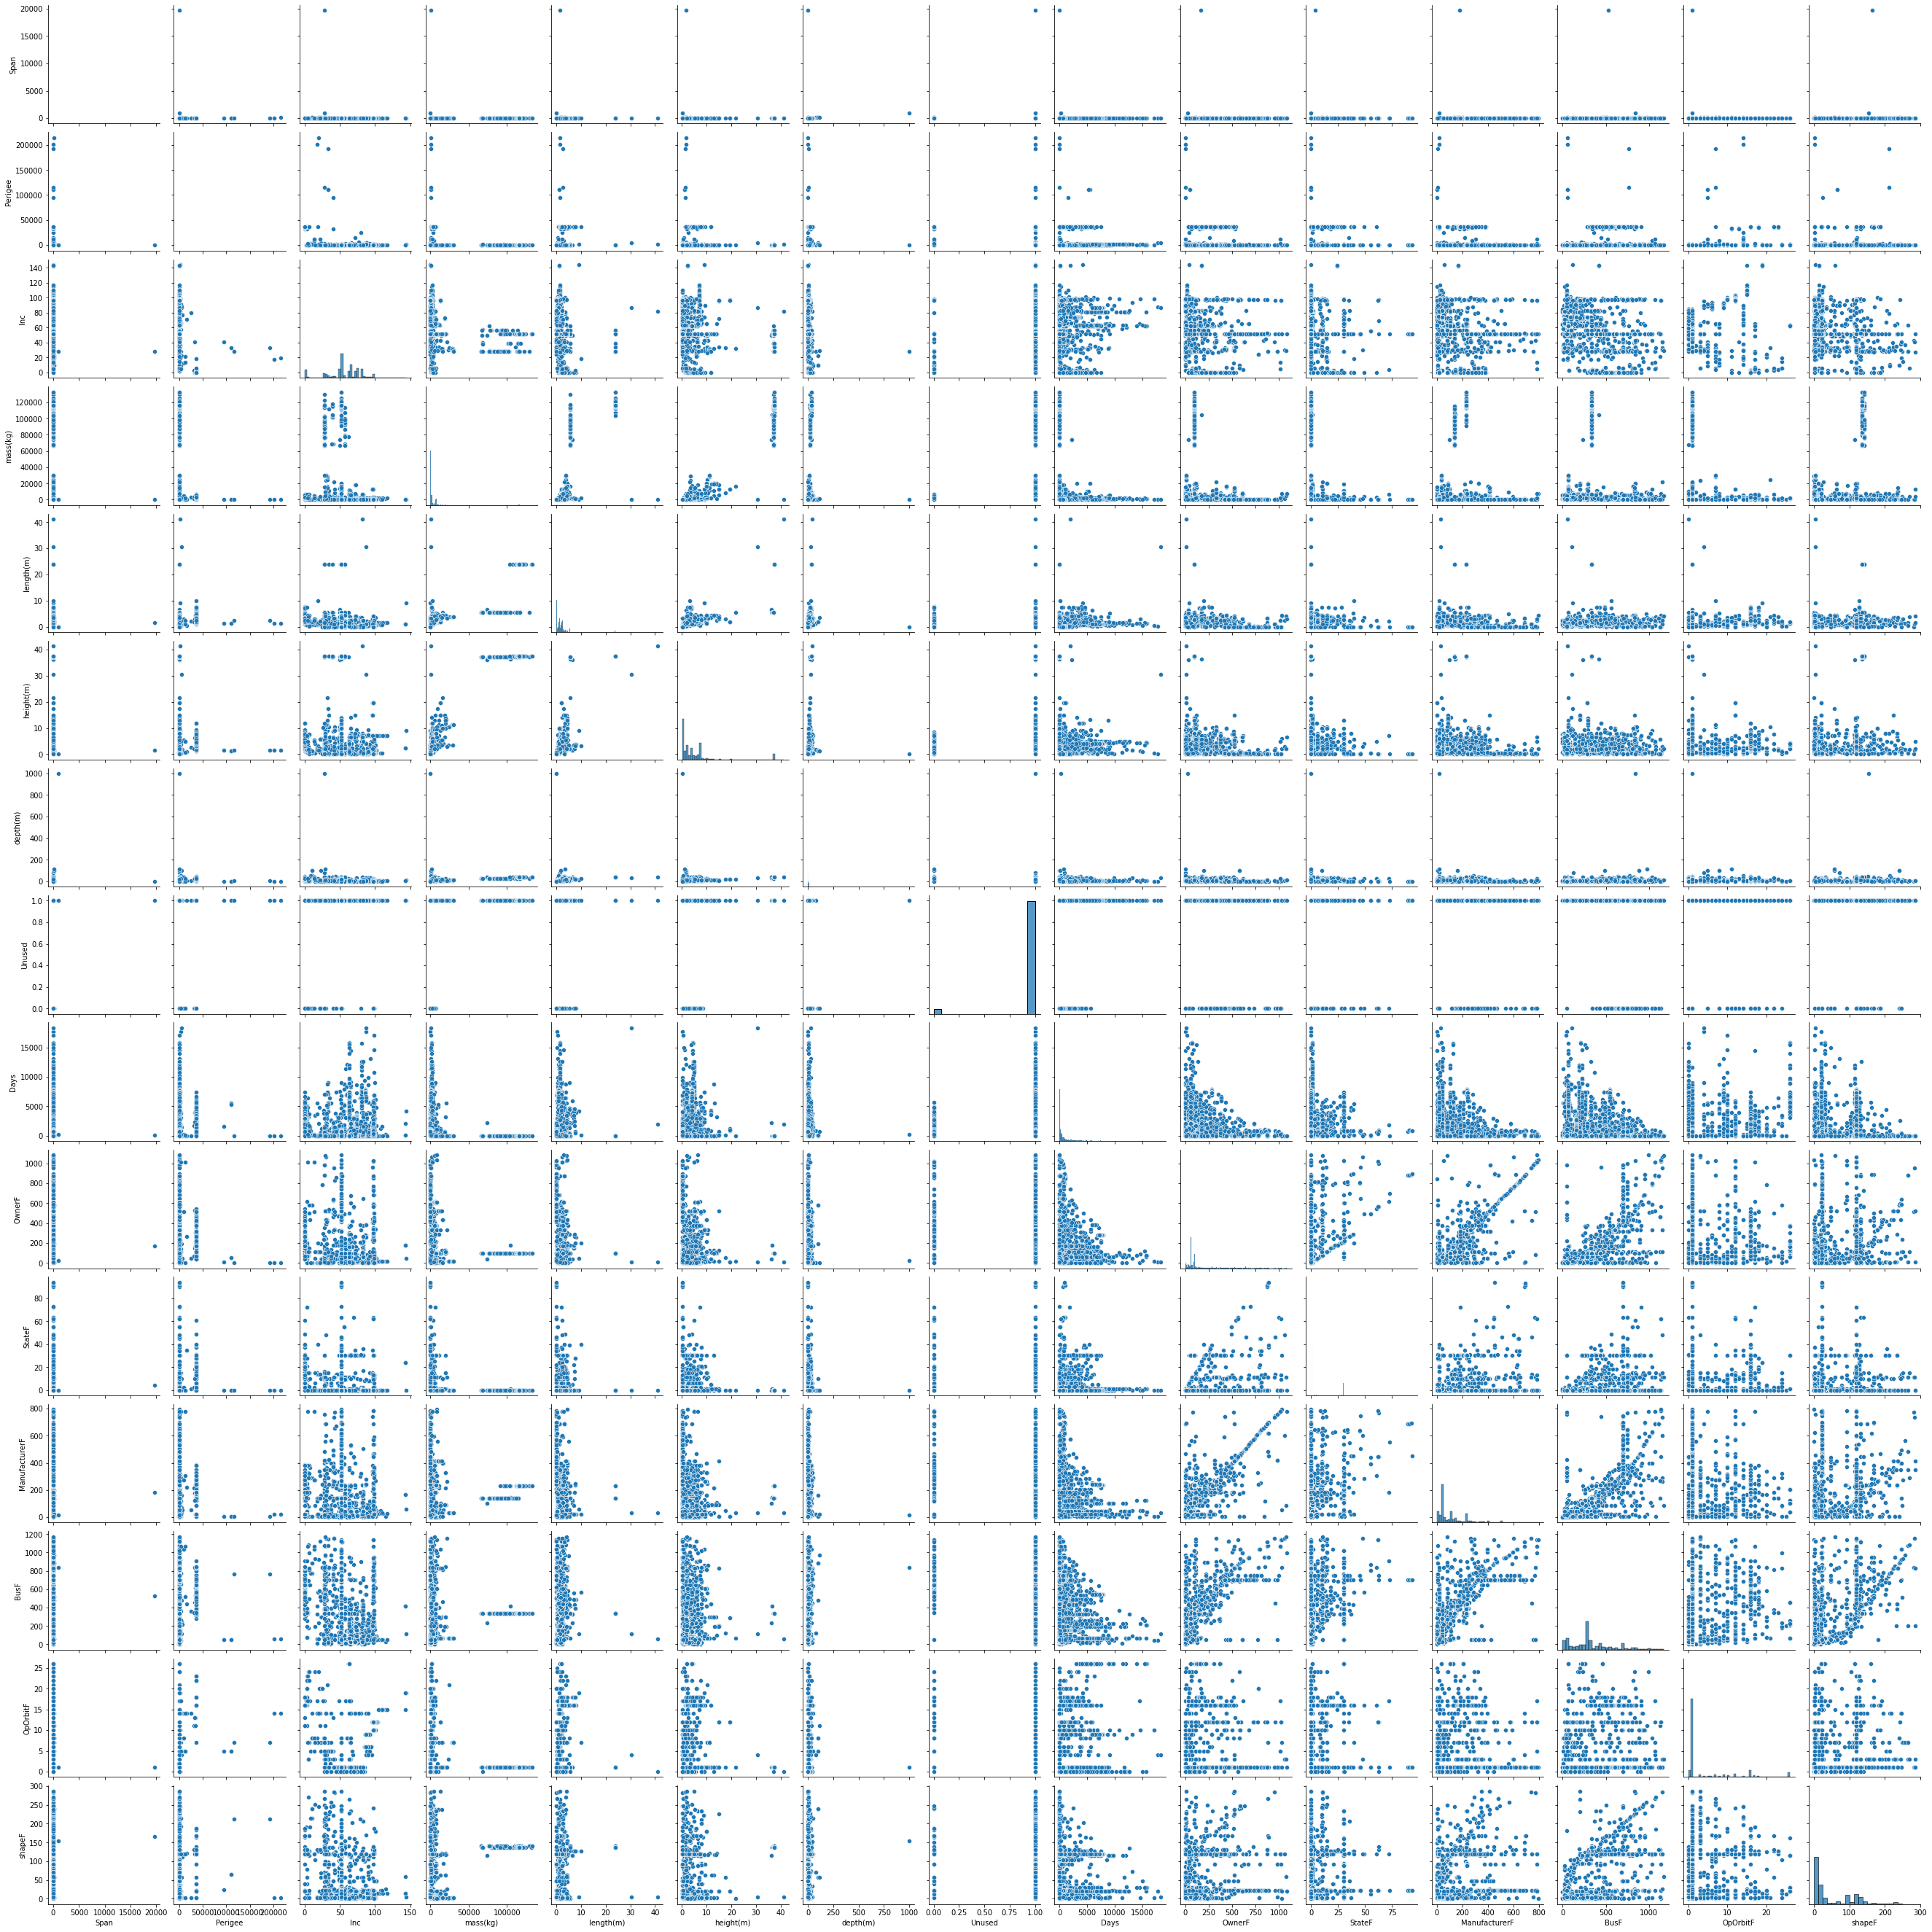

In [83]:
sns.pairplot(df9)
plt.show()

In [84]:
df9['Unused'].value_counts()

True     2730
False     112
Name: Unused, dtype: int64

## Preparation train test et scale

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [86]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2842 non-null   object        
 1   LDate          2842 non-null   datetime64[ns]
 2   Span           2842 non-null   float64       
 3   Perigee        2816 non-null   float64       
 4   Inc            2832 non-null   float64       
 5   mass(kg)       2837 non-null   float64       
 6   length(m)      2842 non-null   float64       
 7   height(m)      2842 non-null   float64       
 8   depth(m)       2842 non-null   float64       
 9   Unused         2842 non-null   bool          
 10  Days           2842 non-null   float64       
 11  OwnerF         2842 non-null   int64         
 12  StateF         2842 non-null   int64         
 13  ManufacturerF  2842 non-null   int64         
 14  BusF           2842 non-null   int64         
 15  OpOrbitF       2842 

In [87]:
df9.describe()

,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
count,2842.000000,2816.000000,2832.000000,2837.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,15.021393,3328.486506,56.103849,6745.828362,1.988113,4.827181,7.083813,1147.457625,140.317734,5.665376,126.811400,340.855032,4.476777,52.391274
std,369.927118,11936.459471,23.720522,21056.472857,3.179873,7.896078,20.849689,2187.143255,184.295903,11.041676,142.459107,248.067323,6.794436,60.796216
min,0.000000,-870.000000,0.000000,0.016000,0.001000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,256.000000,50.660000,5.000000,0.200000,0.300000,0.300000,8.241493,59.000000,0.000000,44.000000,167.000000,1.000000,4.000000
50%,4.000000,373.000000,52.565000,782.950000,1.500000,2.100000,4.000000,222.000000,66.000000,1.000000,56.000000,282.000000,1.000000,20.000000
75%,8.600000,481.250000,73.530000,3903.000000,2.400000,6.500000,7.990000,1033.000000,111.500000,1.000000,168.000000,439.000000,5.000000,93.000000
max,19695.000000,215092.000000,144.220000,132931.000000,41.140000,41.140000,1000.000000,18333.000000,1084.000000,94.000000,794.000000,1172.000000,26.000000,287.000000


In [88]:
df9.isna().sum()

Name              0
LDate             0
Span              0
Perigee          26
Inc              10
mass(kg)          5
length(m)         0
height(m)         0
depth(m)          0
Unused            0
Days              0
OwnerF            0
StateF            0
ManufacturerF     0
BusF              0
OpOrbitF          0
shapeF            0
dtype: int64

In [89]:
df9.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df9.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]]

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
0,1961-04-08,0.8,202.0,81.94,148.660,0.900,0.600,0.900,0,0,0,0,0,0
1,1961-04-12,6.5,168.0,64.95,4682.850,2.400,4.300,4.300,1,1,1,1,1,1
4,1961-06-16,1.3,223.0,82.11,941.530,1.520,7.610,7.610,0,0,3,3,1,3
5,1958-10-11,1.0,-870.0,35.89,22.990,0.740,0.760,0.760,3,0,4,4,2,0
8,1959-03-03,0.6,-45.0,29.00,6.030,0.230,0.510,0.510,4,0,5,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,2020-10-18,9.0,253.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131
17708,2020-10-18,9.0,313.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131
17879,2020-11-16,4.9,189.0,51.65,13000.000,4.000,4.900,4.900,524,0,412,830,1,15
17887,2019-04-17,0.0,468.0,51.64,0.016,0.098,0.098,0.098,466,0,271,1125,1,4


In [91]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)

SX_train = scaler.transform(X_train)
SX_test = scaler.transform(X_test)

In [94]:
from sklearn.preprocessing import RobustScaler

In [95]:
scaler = RobustScaler()
scaler.fit(X_train)

RX_train = scaler.transform(X_train)
RX_test = scaler.transform(X_test)

## régression Logistique

In [96]:
LReg = LinearRegression().fit(X_train, y_train)
print('train_score', LReg.score(X_train, y_train))
print('test_score', LReg.score(X_test, y_test))

train_score 0.2860595153681952
test_score -300.34978152950833


In [97]:
SLReg = LinearRegression().fit(SX_train, y_train)

In [98]:
print('train_score', SLReg.score(SX_train, y_train))
print('test_score', SLReg.score(SX_test, y_test))

train_score 0.2860595153681952
test_score -300.34978152951953


In [99]:
RReg = LinearRegression().fit(RX_train, y_train)
print('train_score', LReg.score(RX_train, y_train))
print('test_score', LReg.score(RX_test, y_test))

train_score -0.24370788644320115
test_score -3.706753981641527


c est pas top.... vraiment pas....

## Ridge pour compenser l overfitting

In [100]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.8, random_state=16)
LReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
ridge = Ridge(alpha=.3)

In [103]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 8.86070165e+01 -9.23308824e-03  2.12848758e+01 -6.40516633e-02
  1.76941405e+02  7.56812883e+01 -6.56815476e+01  1.45315456e+00
 -1.63992243e+01 -1.77726008e+00 -4.35311800e-01  1.60540191e+02
  3.75638213e-01]


In [105]:
lasso = Lasso(alpha=0.1)

In [106]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 8.86000301e+01 -9.23493578e-03  2.12845359e+01 -6.40481205e-02
  1.76934811e+02  7.56716420e+01 -6.56702517e+01  1.45317264e+00
 -1.63978472e+01 -1.77731651e+00 -4.35332820e-01  1.60539385e+02
  3.75631705e-01]


In [108]:
print("Linear Regression Model Training Score: ", LReg.score(X_train, y_train))
print("Linear Regression Model Testing Score:", LReg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train,y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.2860595153681952
Linear Regression Model Testing Score: -300.34978152950833
Ridge Regression Model Training Score:  0.28605951474731084
Ridge Regression Model Testing Score:  -300.29228868774413
Lasso Regression Model Training Score:  0.2860595138409565
Lasso Regression Model Testing Score:  -300.24492513786817


In [109]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,test_size=0.8, random_state=16)
LReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
print(LReg.coef_[0])

-1623051256.8874366


In [111]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))


Ridge model: [ 0.00000000e+00 -1.78991681e+02  5.75705386e-01  7.23427621e+00
  4.87853094e-02  2.60271143e+02  4.42868397e+01 -9.16466652e-01
  1.14845053e+01  3.76917104e+01 -1.13372894e+01  1.15676735e+00
 -2.20815196e+01 -1.94607256e+01  2.73888765e-02  7.02702797e+00
  2.02768411e-02 -1.40638938e+02  2.37456234e+01 -7.84150902e+00
 -7.02327102e-01  4.33310693e+00 -8.20675840e-01  7.41420958e-01
  1.91356140e-01 -2.24593476e+00  2.73109244e-02 -1.62614110e-05
 -7.41163168e-04  3.48576856e-03 -2.20047811e-02 -1.45599208e-04
  3.97146705e-03  1.00633401e-03 -7.43719279e-04 -3.20205662e-02
 -6.35330874e-04 -1.92527815e-03 -8.49639099e+00 -2.82922124e-01
 -2.30752469e+00 -1.68078644e-01 -2.69386639e-01  1.67392653e-01
 -7.47848530e-02 -8.22025994e-01  2.55675734e-01  2.78082320e-03
 -1.41625367e-02  1.02687733e-03  5.88307693e-04  2.81174735e-02
  3.77036722e-04 -1.06986897e-03 -8.35808699e-03  5.29950136e-05
 -2.90786098e+01  1.90107909e+02 -2.28052641e+00  1.12126233e+01
  2.30640615

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.34029e-19): result may not be accurate.
  overwrite_a=True).T


In [112]:
lasso = Lasso(alpha=0.03)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -4.39863766e+01  5.96272095e-01  2.74678763e+00
 -6.52953412e-02  3.96189614e+02 -7.55201501e+01  4.77296382e+01
  9.61460305e+00  4.43021270e+01 -6.55745782e+00 -5.06190944e-01
 -8.70329524e+00 -2.77141228e+01  2.06638919e-02  5.11858863e+00
 -3.73483958e-03 -7.97276780e+00  1.56526715e+00 -3.56470841e+00
  4.59322623e-01  4.43253346e-01 -1.45281923e+00  6.19955560e-02
 -5.20110923e+00 -2.31274963e+00  2.78613938e-02  4.38129947e-06
  2.69096597e-02 -2.17016483e-03 -2.29377266e-02 -2.11324199e-04
  3.51409945e-03  5.35225591e-04 -6.91100791e-04 -3.18450608e-02
  2.09576614e-04 -1.67157911e-03 -4.66666462e+00  7.17792635e-01
 -3.04677577e+00 -1.23023919e-01 -1.35726133e-01  7.32944631e-02
 -4.37098552e-02 -8.99495706e-01  3.13061481e-01  4.24982297e-03
  4.09675104e-03  5.26342245e-04  4.92121987e-05  1.14883589e-02
  2.45771628e-04 -2.50618891e-04 -8.55570818e-03  8.60036450e-04
 -6.85361020e+00  1.88215967e+01 -8.53662442e-01 -5.55065015e+00
  5.65091334

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757526959.8604331, tolerance: 341857.95200009836
  positive)


In [113]:
print("Linear Regression Model Training Score: ", LReg.score(X_train, y_train))
print("Linear Regression Model Testing Score:", LReg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train,y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.5711221214016284
Linear Regression Model Testing Score: -13248.33118069295
Ridge Regression Model Training Score:  0.5773116154293112
Ridge Regression Model Testing Score:  -10821.147939313589
Lasso Regression Model Training Score:  0.5568258503718977
Lasso Regression Model Testing Score:  -8615.776312120677


La transfo ridge et lasso améliore le score du train mais c est carnage sur le test set overfitting à mort....

## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
DTR = DecisionTreeRegressor()

In [116]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [117]:
df10 = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]]

In [118]:
print(dict(zip(df10.columns, DTR.feature_importances_)))

{'Span': 0.0, 'Perigee': 1.4233684414831825e-06, 'Inc': 0.33744120596179794, 'mass(kg)': 0.007627075891942036, 'length(m)': 1.1874918177129077e-09, 'height(m)': 6.277658559081706e-05, 'depth(m)': 0.00045945584481200095, 'OwnerF': 1.1862492669072272e-08, 'StateF': 0.00045487496471661716, 'ManufacturerF': 0.00186677376051204, 'BusF': 4.1793302709641205e-08, 'OpOrbitF': 5.572367297436302e-05, 'shapeF': 2.2855712419335006e-06}


In [119]:
print('train score : ' , DTR.score(X_train, y_train))
print('test score : ' , DTR.score(X_test, y_test))
print('depth : ', DTR.get_depth())

train score :  0.9998839124632147
test score :  0.0071881108514849626
depth :  25


In [120]:
DTR2 = DecisionTreeRegressor(max_depth=10)
DTR2.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR2.feature_importances_)))

{'Span': 0.0, 'Perigee': 0.0, 'Inc': 0.34541996110623324, 'mass(kg)': 0.001828438921320282, 'length(m)': 0.0, 'height(m)': 0.0, 'depth(m)': 0.002096186779026193, 'OwnerF': 0.0, 'StateF': 0.0, 'ManufacturerF': 0.0018943252353462415, 'BusF': 0.0, 'OpOrbitF': 0.0, 'shapeF': 0.0}


In [121]:
print('train score : ' , DTR2.score(X_train, y_train))
print('test score : ' , DTR2.score(X_test, y_test))
print('depth : ', DTR2.get_depth())

train score :  0.9794890339075943
test score :  -0.016892407023668232
depth :  10


In [122]:
DTR3 = DecisionTreeRegressor(max_depth=5)
DTR3.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR3.feature_importances_)))

{'Span': 0.0, 'Perigee': 0.0, 'Inc': 0.39186636647889705, 'mass(kg)': 0.0, 'length(m)': 0.0, 'height(m)': 0.0, 'depth(m)': 0.0, 'OwnerF': 0.0, 'StateF': 0.0, 'ManufacturerF': 0.0, 'BusF': 0.0, 'OpOrbitF': 0.005827561611630704, 'shapeF': 0.0}


In [123]:
print('train score : ' , DTR3.score(X_train, y_train))
print('test score : ' , DTR3.score(X_test, y_test))
print('depth : ', DTR3.get_depth())

train score :  0.8548187162813138
test score :  0.27862438301788683
depth :  5


In [124]:
DTR3 = DecisionTreeRegressor(max_depth=3)
DTR3.fit(X_train, y_train)
print(dict(zip(df10.columns, DTR3.feature_importances_)))
print('train score : ' , DTR3.score(X_train, y_train))
print('test score : ' , DTR3.score(X_test, y_test))
print('depth : ', DTR3.get_depth())

{'Span': 0.0, 'Perigee': 0.0, 'Inc': 0.49909547588788644, 'mass(kg)': 0.0, 'length(m)': 0.0, 'height(m)': 0.0, 'depth(m)': 0.0, 'OwnerF': 0.0, 'StateF': 0.0, 'ManufacturerF': 0.0, 'BusF': 0.0, 'OpOrbitF': 0.0, 'shapeF': 0.0}
train score :  0.6711635759699024
test score :  0.2836232950770764
depth :  3


In [125]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2809 non-null   object        
 1   LDate          2809 non-null   datetime64[ns]
 2   Span           2809 non-null   float64       
 3   Perigee        2809 non-null   float64       
 4   Inc            2809 non-null   float64       
 5   mass(kg)       2809 non-null   float64       
 6   length(m)      2809 non-null   float64       
 7   height(m)      2809 non-null   float64       
 8   depth(m)       2809 non-null   float64       
 9   Unused         2809 non-null   bool          
 10  Days           2809 non-null   float64       
 11  OwnerF         2809 non-null   int64         
 12  StateF         2809 non-null   int64         
 13  ManufacturerF  2809 non-null   int64         
 14  BusF           2809 non-null   int64         
 15  OpOrbitF       2809 

Ajout de la colonne date launch

In [126]:
df11 = df9.iloc[:,[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16]]

In [127]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LDate          2809 non-null   datetime64[ns]
 1   Span           2809 non-null   float64       
 2   Perigee        2809 non-null   float64       
 3   Inc            2809 non-null   float64       
 4   mass(kg)       2809 non-null   float64       
 5   length(m)      2809 non-null   float64       
 6   height(m)      2809 non-null   float64       
 7   depth(m)       2809 non-null   float64       
 8   Days           2809 non-null   float64       
 9   OwnerF         2809 non-null   int64         
 10  StateF         2809 non-null   int64         
 11  ManufacturerF  2809 non-null   int64         
 12  BusF           2809 non-null   int64         
 13  OpOrbitF       2809 non-null   int64         
 14  shapeF         2809 non-null   int64         
dtypes: datetime64[ns](1)

In [128]:
df11.head(2)

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF
0,1961-04-08,0.8,202.0,81.94,148.66,0.9,0.6,0.9,410.000000,0,0,0,0,0,0
1,1961-04-12,6.5,168.0,64.95,4682.85,2.4,4.3,4.3,0.324306,1,1,1,1,1,1


In [129]:
from datetime import datetime

In [131]:
df11["DateN"] = (df11["LDate"]-df11["LDate"].min()) / np.timedelta64(1,'D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df11.head(2)

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,DateN
0,1961-04-08,0.8,202.0,81.94,148.66,0.9,0.6,0.9,410.000000,0,0,0,0,0,0,910.0
1,1961-04-12,6.5,168.0,64.95,4682.85,2.4,4.3,4.3,0.324306,1,1,1,1,1,1,914.0


In [134]:
df11['DateN'].describe()

count     2809.000000
mean     10626.186543
std       5876.761928
min          0.000000
25%       6029.000000
50%       9748.000000
75%      14577.000000
max      22702.000000
Name: DateN, dtype: float64

In [135]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LDate          2809 non-null   datetime64[ns]
 1   Span           2809 non-null   float64       
 2   Perigee        2809 non-null   float64       
 3   Inc            2809 non-null   float64       
 4   mass(kg)       2809 non-null   float64       
 5   length(m)      2809 non-null   float64       
 6   height(m)      2809 non-null   float64       
 7   depth(m)       2809 non-null   float64       
 8   Days           2809 non-null   float64       
 9   OwnerF         2809 non-null   int64         
 10  StateF         2809 non-null   int64         
 11  ManufacturerF  2809 non-null   int64         
 12  BusF           2809 non-null   int64         
 13  OpOrbitF       2809 non-null   int64         
 14  shapeF         2809 non-null   int64         
 15  DateN          2809 

In [136]:
df11.iloc[:,[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]]

,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,DateN
0,0.8,202.0,81.94,148.660,0.900,0.600,0.900,0,0,0,0,0,0,910.0
1,6.5,168.0,64.95,4682.850,2.400,4.300,4.300,1,1,1,1,1,1,914.0
4,1.3,223.0,82.11,941.530,1.520,7.610,7.610,0,0,3,3,1,3,979.0
5,1.0,-870.0,35.89,22.990,0.740,0.760,0.760,3,0,4,4,2,0,0.0
8,0.6,-45.0,29.00,6.030,0.230,0.510,0.510,4,0,5,5,3,0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,9.0,253.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131,22653.0
17708,9.0,313.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131,22653.0
17879,4.9,189.0,51.65,13000.000,4.000,4.900,4.900,524,0,412,830,1,15,22682.0
17887,0.0,468.0,51.64,0.016,0.098,0.098,0.098,466,0,271,1125,1,4,22103.0


In [137]:
df11.head()

,LDate,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),Days,OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,DateN
0,1961-04-08,0.8,202.0,81.94,148.66,0.90,0.60,0.90,410.000000,0,0,0,0,0,0,910.0
1,1961-04-12,6.5,168.0,64.95,4682.85,2.40,4.30,4.30,0.324306,1,1,1,1,1,1,914.0
4,1961-06-16,1.3,223.0,82.11,941.53,1.52,7.61,7.61,26.000000,0,0,3,3,1,3,979.0
5,1958-10-11,1.0,-870.0,35.89,22.99,0.74,0.76,0.76,2.198611,3,0,4,4,2,0,0.0
8,1959-03-03,0.6,-45.0,29.00,6.03,0.23,0.51,0.51,0.704167,4,0,5,5,3,0,143.0


In [138]:
X2 = df11.iloc[:,[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]].values
y2 = df11['Days']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.8, random_state=16)

In [139]:
DTR4 = DecisionTreeRegressor(max_depth=3)
DTR4.fit(X2_train, y2_train)
print(dict(zip(df11.columns, DTR4.feature_importances_)))
print('train score : ' , DTR4.score(X2_train, y2_train))
print('test score : ' , DTR4.score(X2_test, y2_test))
print('depth : ', DTR4.get_depth())

{'LDate': 0.0, 'Span': 0.6796816723261825, 'Perigee': 0.14393455802271768, 'Inc': 0.0, 'mass(kg)': 0.0, 'length(m)': 0.0, 'height(m)': 0.0, 'depth(m)': 0.0, 'Days': 0.0, 'OwnerF': 0.0, 'StateF': 0.0010443909074372565, 'ManufacturerF': 0.1753393787436626, 'BusF': 0.0, 'OpOrbitF': 0.0}
train score :  0.6282220088202691
test score :  0.3236747851133024
depth :  3


Pas d'amélioration avec la date de lancement au contraire

## XG_Boost

##Sans la date

In [140]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2809 non-null   object        
 1   LDate          2809 non-null   datetime64[ns]
 2   Span           2809 non-null   float64       
 3   Perigee        2809 non-null   float64       
 4   Inc            2809 non-null   float64       
 5   mass(kg)       2809 non-null   float64       
 6   length(m)      2809 non-null   float64       
 7   height(m)      2809 non-null   float64       
 8   depth(m)       2809 non-null   float64       
 9   Unused         2809 non-null   bool          
 10  Days           2809 non-null   float64       
 11  OwnerF         2809 non-null   int64         
 12  StateF         2809 non-null   int64         
 13  ManufacturerF  2809 non-null   int64         
 14  BusF           2809 non-null   int64         
 15  OpOrbitF       2809 

In [141]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)
scaler = StandardScaler()
scaler.fit(X_train)

SX_train = scaler.transform(X_train)
SX_test = scaler.transform(X_test)

In [143]:
from xgboost import XGBRegressor
import xgboost as xgb

In [144]:
XGBR = XGBRegressor(
    max_depth=20,
    learning_rate = 1,
    objective='reg:squarederror',
    n_estimators=40,
    silent=False
)
XGBR.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:723.579
[1]	validation_0-mae:728.132
[2]	validation_0-mae:737.975
[3]	validation_0-mae:740.589
[4]	validation_0-mae:742.292
[5]	validation_0-mae:743.152
[6]	validation_0-mae:743.668
[7]	validation_0-mae:743.767
[8]	validation_0-mae:743.869
[9]	validation_0-mae:743.964
[10]	validation_0-mae:744.005
[11]	validation_0-mae:744.019
[12]	validation_0-mae:744.027
[13]	validation_0-mae:744.039
[14]	validation_0-mae:744.041
[15]	validation_0-mae:744.042
[16]	validation_0-mae:744.043
[17]	validation_0-mae:744.044
[18]	validation_0-mae:744.044
[19]	validation_0-mae:744.044
[20]	validation_0-mae:744.044
[21]	validation_0-mae:744.044
[22]	validation_0-mae:744.044
[23]	validation_0-mae:744.044
[24]	validation_0-mae:744.044
[25]	validation_0-mae:744.044
[26]	validation_0-mae:744.044
[27]	validation_0-mae:744.044
[28]	validation_0-mae:744.044
[29]	validation_0-mae:744.044
[30]	validation_0-mae:744.044
[31]	validation_0-mae:744.044
[32]	validation_0-mae:744.044
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

La MAE est énorme.....

In [145]:
from sklearn.metrics import r2_score, mean_absolute_error

In [146]:
print('MAE train', mean_absolute_error(y_train, XGBR.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR.predict(X_test)))

MAE train 2.1866739071815613
MAE test 744.0446773245031


In [147]:
print('R2 train', r2_score(y_train, XGBR.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR.predict(X_test)))

R2 train 0.9998839124631016
R2 test 0.3456416284589492


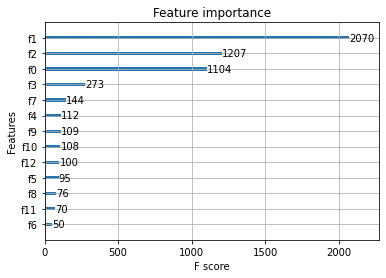

In [148]:
xgb.plot_importance(XGBR)

In [149]:
XGBR2 = XGBRegressor(
    max_depth=5,
    learning_rate = 0.5,
    objective='reg:squarederror',
    n_estimators=40,
    silent=False
)
XGBR2.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:796.791
[1]	validation_0-mae:682.097
[2]	validation_0-mae:667.176
[3]	validation_0-mae:659.291
[4]	validation_0-mae:662.837
[5]	validation_0-mae:666.33
[6]	validation_0-mae:670.099
[7]	validation_0-mae:678.313
[8]	validation_0-mae:677.019
[9]	validation_0-mae:680.648
[10]	validation_0-mae:677.661
[11]	validation_0-mae:675.979
[12]	validation_0-mae:676.057
[13]	validation_0-mae:674.019
[14]	validation_0-mae:674.017
[15]	validation_0-mae:675.728
[16]	validation_0-mae:675.198
[17]	validation_0-mae:675.991
[18]	validation_0-mae:676.383
[19]	validation_0-mae:676.111
[20]	validation_0-mae:677.321
[21]	validation_0-mae:677.237
[22]	validation_0-mae:676.363
[23]	validation_0-mae:676.888
[24]	validation_0-mae:675.928
[25]	validation_0-mae:675.047
[26]	validation_0-mae:675.833
[27]	validation_0-mae:675.315
[28]	validation_0-mae:674.532
[29]	validation_0-mae:674.641
[30]	validation_0-mae:674.589
[31]	validation_0-mae:673.781
[32]	validation_0-mae:674.613
[33]	validation_0-mae

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=40,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

In [150]:
print('MAE train', mean_absolute_error(y_train, XGBR2.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR2.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR2.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR2.predict(X_test)))


MAE train 61.84892634361374
MAE test 675.826008153096
R2 train 0.9982934467394956
R2 test 0.48293559465626035


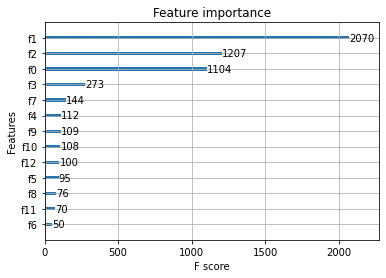

In [151]:
xgb.plot_importance(XGBR)

Le R2 est un peu mieux mais la MAE est haute presque 2 ans...

In [152]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2809 non-null   object        
 1   LDate          2809 non-null   datetime64[ns]
 2   Span           2809 non-null   float64       
 3   Perigee        2809 non-null   float64       
 4   Inc            2809 non-null   float64       
 5   mass(kg)       2809 non-null   float64       
 6   length(m)      2809 non-null   float64       
 7   height(m)      2809 non-null   float64       
 8   depth(m)       2809 non-null   float64       
 9   Unused         2809 non-null   bool          
 10  Days           2809 non-null   float64       
 11  OwnerF         2809 non-null   int64         
 12  StateF         2809 non-null   int64         
 13  ManufacturerF  2809 non-null   int64         
 14  BusF           2809 non-null   int64         
 15  OpOrbitF       2809 

changement des hyperparamètres

In [153]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

#X = df9.iloc[:,[2, 3, 4, 5, 11,7,13, 15, 16]].values
#y = df9['Days']

In [154]:
XGBR3 = XGBRegressor(
    max_depth=5,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    silent=False
)
XGBR3.fit(X_train, y_train, eval_metric='mae', eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-mae:1062.05
[1]	validation_0-mae:986.889
[2]	validation_0-mae:920.728
[3]	validation_0-mae:865.671
[4]	validation_0-mae:820.941
[5]	validation_0-mae:786.042
[6]	validation_0-mae:757.314
[7]	validation_0-mae:739.579
[8]	validation_0-mae:721.951
[9]	validation_0-mae:706.528
[10]	validation_0-mae:697.286
[11]	validation_0-mae:686.253
[12]	validation_0-mae:678.146
[13]	validation_0-mae:675.039
[14]	validation_0-mae:672.225
[15]	validation_0-mae:673.458
[16]	validation_0-mae:673.851
[17]	validation_0-mae:674.414
[18]	validation_0-mae:670.978
[19]	validation_0-mae:669.468
[20]	validation_0-mae:669.831
[21]	validation_0-mae:668.678
[22]	validation_0-mae:667.412
[23]	validation_0-mae:667.829
[24]	validation_0-mae:665.895
[25]	validation_0-mae:665.123
[26]	validation_0-mae:665.072
[27]	validation_0-mae:665.9
[28]	validation_0-mae:667.178
[29]	validation_0-mae:668.073
[30]	validation_0-mae:667.326
[31]	validation_0-mae:668.153
[32]	validation_0-mae:669.077
[33]	validation_0-mae:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=False, subsample=1, verbosity=1)

In [155]:
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 132.83550220091618
MAE test 671.2334581978588
R2 train 0.9924225196428703
R2 test 0.48094968586936204


In [156]:
XGBR3 = XGBRegressor(
    max_depth=3,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    silent=False
)
XGBR3.fit(X_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 371.31300861495015
MAE test 711.1355348079891
R2 train 0.9314104244392061
R2 test 0.5107622365737526


In [157]:
XGBR3 = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBR3.fit(X_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test)))

MAE train 602.5604259315115
MAE test 741.0231520860102
R2 train 0.7291642467627295
R2 test 0.5520764096339377


In [158]:
XGBR3 = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBR3.fit(RX_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(RX_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(RX_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(RX_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(RX_test)))

MAE train 602.5604259315115
MAE test 740.9269871857973
R2 train 0.7291642467627295
R2 test 0.5522148467560095


In [159]:
XGBR3 = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBR3.fit(RX_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(SX_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(SX_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(SX_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(SX_test)))

MAE train 1174.7631555173439
MAE test 1139.9348299761639
R2 train 0.010436991223608527
R2 test -0.020841203455224777


Modèle retenu :

XGBR3 = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBR3.fit(X_train, y_train)
print('MAE train', mean_absolute_error(y_train, XGBR3.predict(X_train)))
print('MAE test', mean_absolute_error(y_test, XGBR3.predict(X_test)))
print('R2 train', r2_score(y_train, XGBR3.predict(X_train)))
print('R2 test', r2_score(y_test, XGBR3.predict(X_test))) 

MAE train 577.0017116008962
MAE test 730.8322327386372
R2 train 0.7410103764612914
R2 test 0.56064619352442

Rajout de la colonne date dans l'analyse

In [160]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           2809 non-null   object        
 1   LDate          2809 non-null   datetime64[ns]
 2   Span           2809 non-null   float64       
 3   Perigee        2809 non-null   float64       
 4   Inc            2809 non-null   float64       
 5   mass(kg)       2809 non-null   float64       
 6   length(m)      2809 non-null   float64       
 7   height(m)      2809 non-null   float64       
 8   depth(m)       2809 non-null   float64       
 9   Unused         2809 non-null   bool          
 10  Days           2809 non-null   float64       
 11  OwnerF         2809 non-null   int64         
 12  StateF         2809 non-null   int64         
 13  ManufacturerF  2809 non-null   int64         
 14  BusF           2809 non-null   int64         
 15  OpOrbitF       2809 

In [161]:
X = df9.iloc[:,[2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16]].values
y = df9['Days']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=16)

## Avec la date

In [163]:
df11.iloc[:,[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]]

,Span,Perigee,Inc,mass(kg),length(m),height(m),depth(m),OwnerF,StateF,ManufacturerF,BusF,OpOrbitF,shapeF,DateN
0,0.8,202.0,81.94,148.660,0.900,0.600,0.900,0,0,0,0,0,0,910.0
1,6.5,168.0,64.95,4682.850,2.400,4.300,4.300,1,1,1,1,1,1,914.0
4,1.3,223.0,82.11,941.530,1.520,7.610,7.610,0,0,3,3,1,3,979.0
5,1.0,-870.0,35.89,22.990,0.740,0.760,0.760,3,0,4,4,2,0,0.0
8,0.6,-45.0,29.00,6.030,0.230,0.510,0.510,4,0,5,5,3,0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,9.0,253.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131,22653.0
17708,9.0,313.0,53.05,260.000,3.300,0.200,9.000,876,0,686,1113,1,131,22653.0
17879,4.9,189.0,51.65,13000.000,4.000,4.900,4.900,524,0,412,830,1,15,22682.0
17887,0.0,468.0,51.64,0.016,0.098,0.098,0.098,466,0,271,1125,1,4,22103.0


In [171]:
X2 = df11.iloc[:,[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]].values
y2 = df11['Days']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.8, random_state=16)

In [172]:
XGBRD = XGBRegressor(
    max_depth=6,
    gamma=1,
    learning_rate = 0.1,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBRD.fit(X2_train, y2_train)
print('MAE train', mean_absolute_error(y_train, XGBRD.predict(X2_train)))
print('MAE test', mean_absolute_error(y_test, XGBRD.predict(X2_test)))
print('R2 train', r2_score(y_train, XGBRD.predict(X2_train)))
print('R2 test', r2_score(y_test, XGBRD.predict(X2_test)))

MAE train 565.5174461895746
MAE test 717.4570357959218
R2 train 0.7497233180533133
R2 test 0.5660642492143471


In [173]:
XGBRD = XGBRegressor(
    max_depth=6,
    gamma=0.1,
    learning_rate = 0.15,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBRD.fit(X2_train, y2_train)
print('MAE train', mean_absolute_error(y_train, XGBRD.predict(X2_train)))
print('MAE test', mean_absolute_error(y_test, XGBRD.predict(X2_test)))
print('R2 train', r2_score(y_train, XGBRD.predict(X2_train)))
print('R2 test', r2_score(y_test, XGBRD.predict(X2_test)))

MAE train 515.7440086889277
MAE test 722.9926179881716
R2 train 0.795675309326652
R2 test 0.563736140874526


In [174]:
XGBRD = XGBRegressor(
    max_depth=5,
    gamma=0.1,
    learning_rate = 0.15,
    objective='reg:squarederror',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBRD.fit(X2_train, y2_train)
print('MAE train', mean_absolute_error(y_train, XGBRD.predict(X2_train)))
print('MAE test', mean_absolute_error(y_test, XGBRD.predict(X2_test)))
print('R2 train', r2_score(y_train, XGBRD.predict(X2_train)))
print('R2 test', r2_score(y_test, XGBRD.predict(X2_test)))

MAE train 527.3448226253262
MAE test 726.2417987966405
R2 train 0.7957974805278027
R2 test 0.5640723481838267


Celui là me semble le + performant

In [175]:
XGBRD = XGBRegressor(
    max_depth=5,
    gamma=0.01,
    learning_rate = 0.15,
    objective='reg:gamma',
    n_estimators=100,
    min_child_weight=50,
    subsample=0.9,
    silent=False
)
XGBRD.fit(X2_train, y2_train)
print('MAE train', mean_absolute_error(y_train, XGBRD.predict(X2_train)))
print('MAE test', mean_absolute_error(y_test, XGBRD.predict(X2_test)))
print('R2 train', r2_score(y_train, XGBRD.predict(X2_train)))
print('R2 test', r2_score(y_test, XGBRD.predict(X2_test)))

MAE train 458.44561589748747
MAE test 617.8676418229837
R2 train 0.7388195000268898
R2 test 0.5658051816279822


# Export CSV

In [169]:
df11.to_csv('SatForML.csv')
!cp SatForML.csv "drive/My Drive/"


In [178]:
df15.to_csv('SatForPredict.csv')
!cp SatForPredict.csv "drive/My Drive/"